In [3]:
import sys
import os
import json
import numpy as np
from collections import defaultdict, Counter
import utils

In [4]:
os.environ['PT_DATA_DIR'] = '/home/hoyeung/blob_matterport3d/'
PT_DATA_DIR = '/home/hoyeung/blob_matterport3d/'
PT_OUTPUT_DIR = '/home/hoyeung/blob_experiments/output_philly/'

In [5]:
PT_EXP_NAME = '20200206_philly_aggrevate_tunning/'

### Load Data

In [6]:
# Val seen data
with open(PT_DATA_DIR + 'asknav/asknav_val_seen.json', "r") as f:
    val_seen_data = json.load(f)
    
# Val unseen data
with open(PT_DATA_DIR + 'asknav/asknav_val_unseen.json', "r") as f:
    val_unseen_data = json.load(f)

In [7]:
# l1 results
JOB_NAME = "data_94798_seed_42_batch_size_250_tr_batch_size_512_loss_l1_lr_0.0001_beta_decay_0.9/"
with open(PT_OUTPUT_DIR + PT_EXP_NAME + JOB_NAME + "value_estimation_no_ask_no_recovery_last_val_seen_for_eval.json", "r") as f:
    val_seen_l1_results = json.load(f)
    
with open(PT_OUTPUT_DIR + PT_EXP_NAME + JOB_NAME + "value_estimation_no_ask_no_recovery_last_val_unseen_for_eval.json", "r") as f:
    val_unseen_l1_results = json.load(f)

In [8]:
# l2 results
JOB_NAME = "data_94798_seed_42_batch_size_250_tr_batch_size_512_loss_l2_lr_0.0001_beta_decay_0.8/"
with open(PT_OUTPUT_DIR + PT_EXP_NAME + JOB_NAME + "value_estimation_no_ask_no_recovery_last_val_seen_for_eval.json", "r") as f:
    val_seen_l2_results = json.load(f)
    
with open(PT_OUTPUT_DIR + PT_EXP_NAME + JOB_NAME + "value_estimation_no_ask_no_recovery_last_val_unseen_for_eval.json", "r") as f:
    val_unseen_l2_results = json.load(f)

### Examine

In [15]:
val_seen_l1_results[0].keys()

dict_keys(['instr_id', 'agent_q_values', 'teacher_q_values', 'beta', 'expert_rollin_bool', 'scan', 'trajectory', 'agent_nav'])

In [31]:
val_seen_data[0].keys()

dict_keys(['trajectories', 'start_region', 'path_id', 'distances', 'paths', 'scan', 'instructions', 'end_region_name', 'start_region_name', 'object_name', 'end_regions', 'object_indices', 'heading'])

In [32]:
val_seen_data[0]['paths']

[['6cba04f9e76f463094dd2a6ff64d1e9f',
  '9e3bb94fbf7f4dc0a74911414ca95753',
  '7980b9f903164d48aaee2dbeb5615796',
  'c9ac0c98d16a4105a3214989cac149c0',
  '48a2541fc50b4a57a609698e2375e9b1',
  '4547d37b305e41bdad0de45ade6971ca',
  '6ab11272308c46068c9ae583da8ff311',
  'd2600c4cac6445a7b7f0eef51a074043'],
 ['6cba04f9e76f463094dd2a6ff64d1e9f',
  '9096013c3596463b9c0500520d12fef1',
  '39791f422b0244aa84b3d41d9b218f7e',
  '3182b6eba9ce405f9e1c0af86cc6b862',
  '97739a403b984dcd8253741a073b18dd']]

In [29]:
val_seen_l1_results[0]['instr_id']

'245241_0'

In [19]:
len(val_seen_l1_results[0]['agent_q_values'])

10

In [20]:
len(val_seen_l1_results[0]['agent_q_values'][0])

36

In [23]:
len(val_seen_l1_results[0]['teacher_q_values'])

10

In [22]:
len(val_seen_l1_results[0]['teacher_q_values'][0])

36

In [66]:
val_seen_l1_results[0]['trajectory']

[['e651ab44d0d849a285bd40eca8b405e7', 1.0471975511965976, 0.0],
 ['e651ab44d0d849a285bd40eca8b405e7', 1.5707963267948966, 0.0],
 ['cee43747e62e4df58398d371386e6012', 1.5707963267948966, 0.0],
 ['cee43747e62e4df58398d371386e6012', 1.5707963267948966, 0.0],
 ['79569bffc7674614a31ad21a0d3f922f', 1.5707963267948966, 0.0],
 ['79569bffc7674614a31ad21a0d3f922f', 2.0943951023931953, 0.0],
 ['ad506c95650a444eb205c2f9ebbd26fc', 2.0943951023931953, 0.0],
 ['ad506c95650a444eb205c2f9ebbd26fc', 2.0943951023931953, 0.0],
 ['67a696124eb54cb9bb570f28df5fb8ab', 2.0943951023931953, 0.0],
 ['67a696124eb54cb9bb570f28df5fb8ab', 1.5707963267948966, 0.0],
 ['6f0a4e9374f24721a85f9853e9381aaf', 1.5707963267948966, 0.0],
 ['6f0a4e9374f24721a85f9853e9381aaf', 1.5707963267948966, 0.0],
 ['2b12f2ce332c461cb6d7d4f25b64990e', 1.5707963267948966, 0.0],
 ['2b12f2ce332c461cb6d7d4f25b64990e', 4.71238898038469, 0.0],
 ['2043564288ac41a48c1e6caad1e7a48c', 4.71238898038469, 0.0],
 ['2043564288ac41a48c1e6caad1e7a48c', 1.5707

In [30]:
val_seen_data[0]['path_id']

193069

### Partition by gold trajectory length

In [27]:
len([res for res in val_seen_l1_results if '_0' in res['instr_id']])

4874

In [7]:
val_seen_gold_traj_lengths = {dat['path_id']: min([len(p) for p in dat['paths']]) for dat in val_seen_data}
val_unseen_gold_traj_lengths = {dat['path_id']: min([len(p) for p in dat['paths']]) for dat in val_unseen_data}

### Compute loss per task

In [8]:
def l1_loss_func_per_sphere(pred, tar):
    assert np.sum(pred == 1e9) == np.sum(tar == 1e9)
    
    pred = np.array(pred)
    tar  = np.array(tar)
    tot  = 36 - np.sum(pred == 1e9)
    assert tot > 0
    
    return np.sum(np.abs(np.array(pred) - np.array(tar))) / tot

In [9]:
def l2_loss_func_per_sphere(pred, tar):
    assert np.sum(pred == 1e9) == np.sum(tar == 1e9)
    
    pred = np.array(pred)
    tar  = np.array(tar)
    tot  = 36 - np.sum(pred == 1e9)
    assert tot > 0
    
    return np.sum((np.array(pred) - np.array(tar))**2) / tot

In [10]:
def loss_per_task(loss_func, task):
    time_steps = len(task['agent_q_values'])
    task_loss = np.mean([loss_func(task['agent_q_values'][t], task['teacher_q_values'][t]) for t in range(time_steps)])
    return task_loss, time_steps

In [11]:
loss, steps = loss_per_task(l1_loss_func_per_sphere, val_seen_l1_results[70])
loss

3.1724950412149107

In [12]:
loss, steps = loss_per_task(l2_loss_func_per_sphere, val_seen_l1_results[70])
loss

19.93553269017234

In [13]:
def loss_per_task_by_time_steps(loss_func, task):
    time_steps = len(task['agent_q_values'])
    task_losses = {t: loss_func(task['agent_q_values'][t], task['teacher_q_values'][t]) for t in range(time_steps)}
    return task_losses, time_steps

In [14]:
losses, steps = loss_per_task_by_time_steps(l1_loss_func_per_sphere, val_seen_l1_results[70])
losses

{0: 8.841291237964985,
 1: 6.37620116823375,
 2: 2.890797793730859,
 3: 0.47173782182042895,
 4: 1.0559299459304885,
 5: 1.463072385869798,
 6: 1.1084349349540659}

In [15]:
losses, steps = loss_per_task_by_time_steps(l2_loss_func_per_sphere, val_seen_l1_results[70])
losses

{0: 82.07558748213101,
 1: 42.17602700843731,
 2: 9.594430045297452,
 3: 0.25124674172675426,
 4: 1.6023701762542009,
 5: 2.4581099696736595,
 6: 1.3909574076859565}

### Loop through results

In [16]:
def make_idx_loss_map(results, gold_lengths):
    idx_loss_map = {}

    for task in results:
        l1_loss, timesteps = loss_per_task(l1_loss_func_per_sphere, task)
        l2_loss, _ = loss_per_task(l2_loss_func_per_sphere, task)
        path_id = int(task['instr_id'].split("_")[0])
        
        gold_traj_len = gold_lengths[path_id]

        idx_loss_map[path_id] = {'gold_len':gold_traj_len, 'l1_loss':l1_loss, 'l2_loss':l2_loss, 'rollout_len':timesteps}
    
    return idx_loss_map

In [17]:
idx_loss_map_val_seen_l1 = make_idx_loss_map(val_seen_l1_results, val_seen_gold_traj_lengths)
idx_loss_map_val_unseen_l1 = make_idx_loss_map(val_unseen_l1_results, val_unseen_gold_traj_lengths)

idx_loss_map_val_seen_l2 = make_idx_loss_map(val_seen_l2_results, val_seen_gold_traj_lengths)
idx_loss_map_val_unseen_l2 = make_idx_loss_map(val_unseen_l2_results, val_unseen_gold_traj_lengths)

In [18]:
def make_idx_loss_by_time_step_map(results, gold_lengths):
    idx_losses_map = {}

    for task in results:
        l1_losses, timesteps = loss_per_task_by_time_steps(l1_loss_func_per_sphere, task)
        l2_losses, _ = loss_per_task_by_time_steps(l2_loss_func_per_sphere, task)
        path_id = int(task['instr_id'].split("_")[0])
        
        gold_traj_len = gold_lengths[path_id]

        idx_losses_map[path_id] = {'gold_len':gold_traj_len, 'l1_loss':l1_losses, 'l2_loss':l2_losses, 'rollout_len':timesteps}
    
    return idx_losses_map

In [19]:
idx_loss_by_time_map_val_seen_l1 = make_idx_loss_by_time_step_map(val_seen_l1_results, val_seen_gold_traj_lengths)
idx_loss_by_time_map_val_unseen_l1 = make_idx_loss_by_time_step_map(val_unseen_l1_results, val_unseen_gold_traj_lengths)

idx_loss_by_time_map_val_seen_l2 = make_idx_loss_by_time_step_map(val_seen_l2_results, val_seen_gold_traj_lengths)
idx_loss_by_time_map_val_unseen_l2 = make_idx_loss_by_time_step_map(val_unseen_l2_results, val_unseen_gold_traj_lengths)

### Group by gold traj lengths

In [20]:
def compute_len_group_avg(idx_loss_map, loss_str):

    gold_length_to_loss = {i:[] for i in range(30)}

    for idx in idx_loss_map:
        task = idx_loss_map[idx]
        gold_length_to_loss[task['gold_len']].append(task[loss_str])

    gold_length_to_loss_avg = {i: np.mean(gold_length_to_loss[i]) for i in range(30)}
    
    return gold_length_to_loss_avg

In [21]:
len_group_avg_val_seen_l1 = compute_len_group_avg(idx_loss_map_val_seen_l1, 'l1_loss')
len_group_avg_val_seen_l2 = compute_len_group_avg(idx_loss_map_val_seen_l2, 'l2_loss')

/data/anaconda/envs/py35/lib/python3.5/site-packages/numpy/core/fromnumeric.py:2957: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/data/anaconda/envs/py35/lib/python3.5/site-packages/numpy/core/_methods.py:80: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


In [22]:
len_group_avg_val_unseen_l1 = compute_len_group_avg(idx_loss_map_val_unseen_l1, 'l1_loss')
len_group_avg_val_unseen_l2 = compute_len_group_avg(idx_loss_map_val_unseen_l2, 'l2_loss')

/data/anaconda/envs/py35/lib/python3.5/site-packages/numpy/core/fromnumeric.py:2957: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/data/anaconda/envs/py35/lib/python3.5/site-packages/numpy/core/_methods.py:80: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


### Plot by gold traj lengths

In [23]:
import matplotlib.pyplot as plt

In [24]:
def plot(len_group_avg):
    x = np.array([gold_len for gold_len, loss_avg in len_group_avg.items()])
    height = np.array([loss_avg for gold_len, loss_avg in len_group_avg.items()])
    plt.figure(figsize=(20,10))
    plt.bar(x, height, width=0.8)

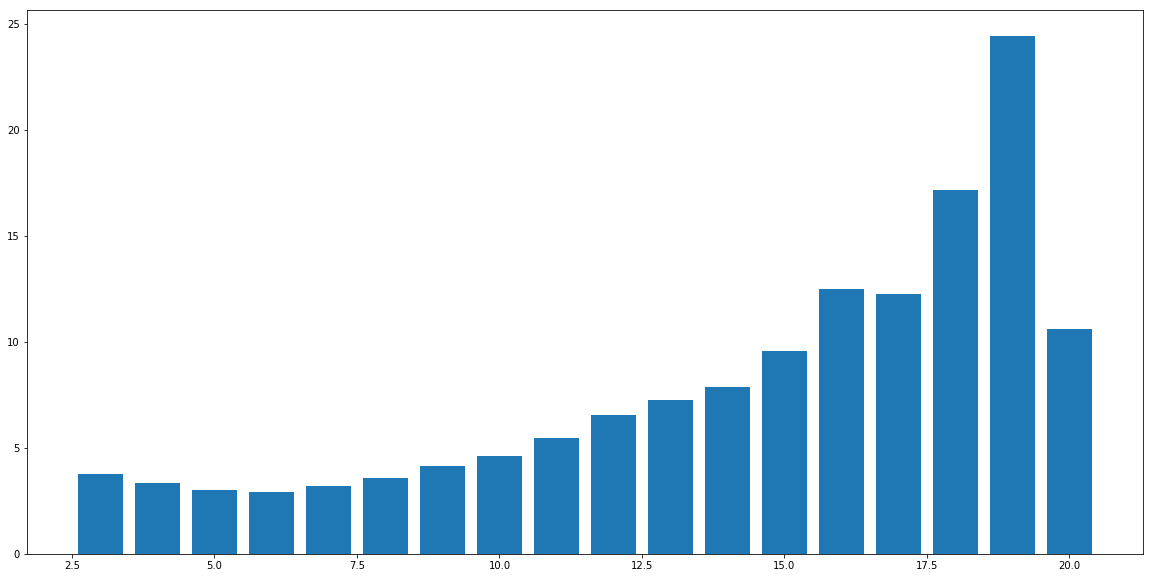

In [25]:
plot(len_group_avg_val_seen_l1)

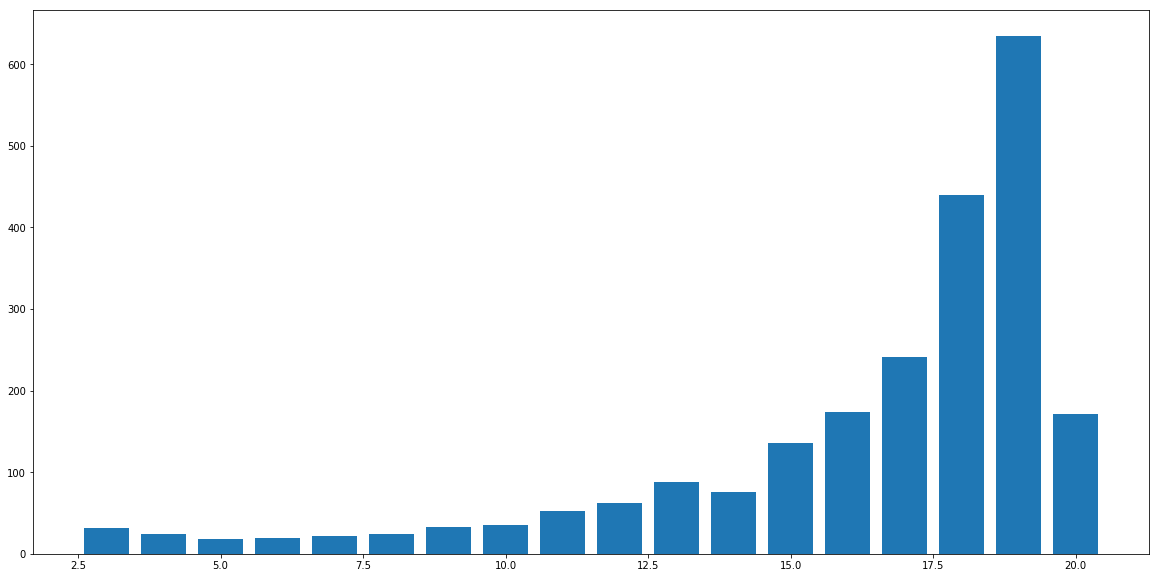

In [26]:
plot(len_group_avg_val_seen_l2)

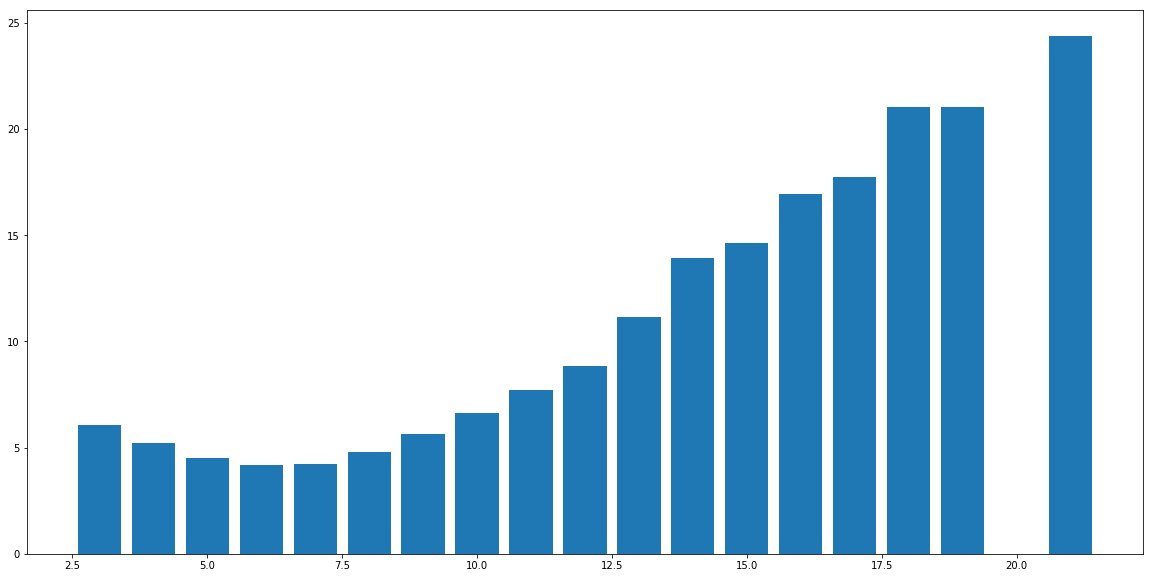

In [27]:
plot(len_group_avg_val_unseen_l1)

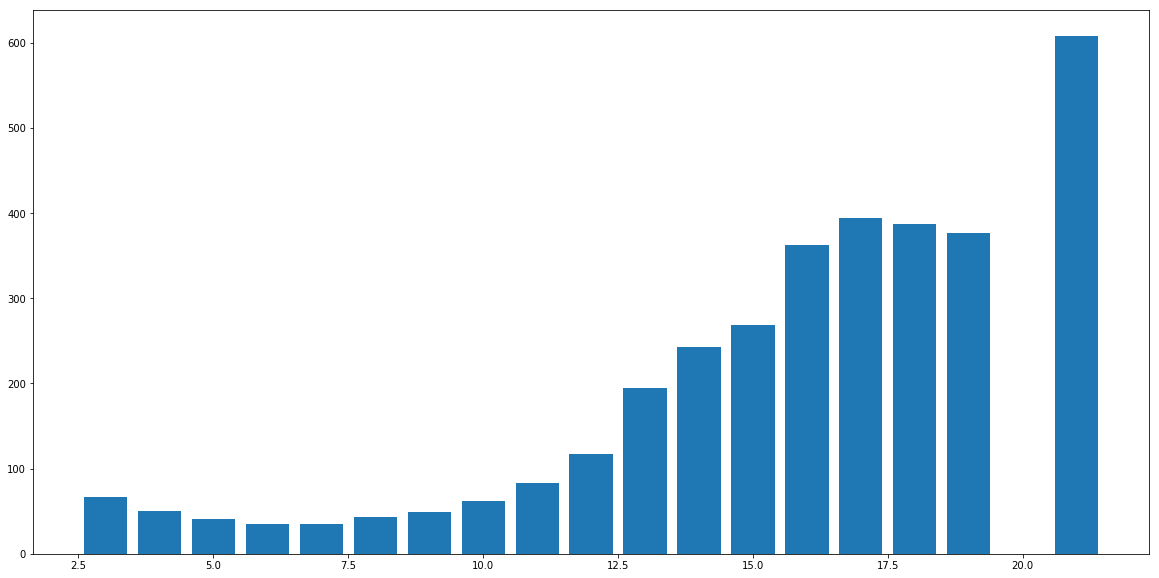

In [28]:
plot(len_group_avg_val_unseen_l2)

### Group by timesteps

In [29]:
def comput_timestep_group_avg(idx_loss_by_time_map, loss_str):
    
    timestep_to_loss = {t:[] for t in range(30)}
    
    for idx in idx_loss_by_time_map:
        task = idx_loss_by_time_map[idx]
        for t in task[loss_str]:
            timestep_to_loss[t].append(task[loss_str][t])
    
#     import pdb; pdb.set_trace()
    timestep_to_loss_avg = {i: np.mean(timestep_to_loss[i]) for i in range(30)}
    
    return timestep_to_loss_avg

In [30]:
timestep_group_avg_val_seen_l1 = comput_timestep_group_avg(idx_loss_by_time_map_val_seen_l1, 'l1_loss')
timestep_group_avg_val_seen_l2 = comput_timestep_group_avg(idx_loss_by_time_map_val_seen_l2, 'l2_loss')

timestep_group_avg_val_unseen_l1 = comput_timestep_group_avg(idx_loss_by_time_map_val_unseen_l1, 'l1_loss')
timestep_group_avg_val_unseen_l2 = comput_timestep_group_avg(idx_loss_by_time_map_val_unseen_l2, 'l2_loss')

/data/anaconda/envs/py35/lib/python3.5/site-packages/numpy/core/fromnumeric.py:2957: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/data/anaconda/envs/py35/lib/python3.5/site-packages/numpy/core/_methods.py:80: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


### Plot by time steps

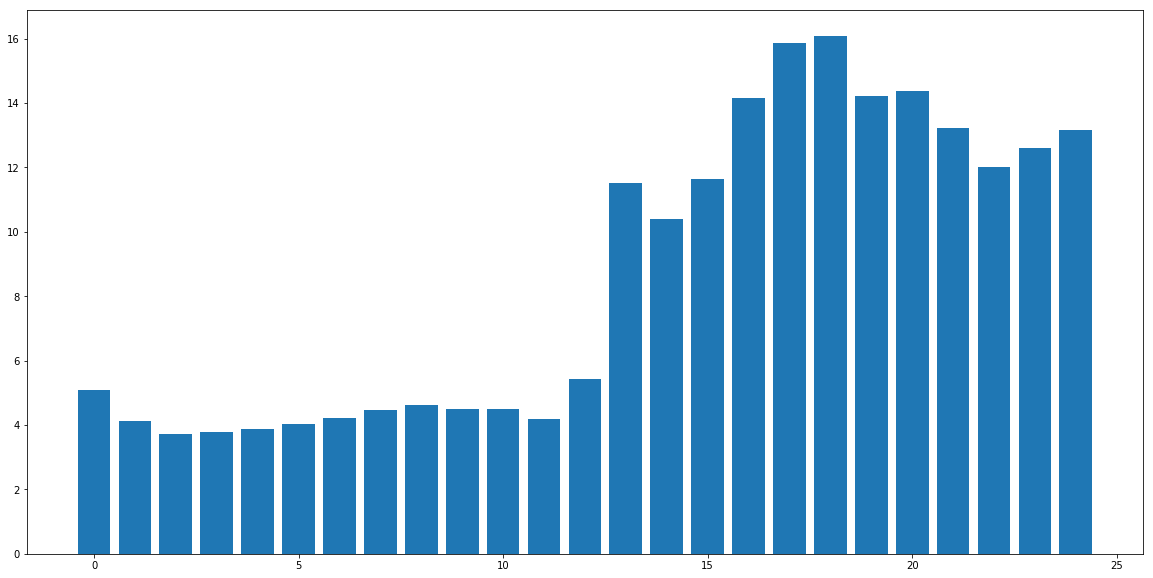

In [31]:
plot(timestep_group_avg_val_seen_l1)

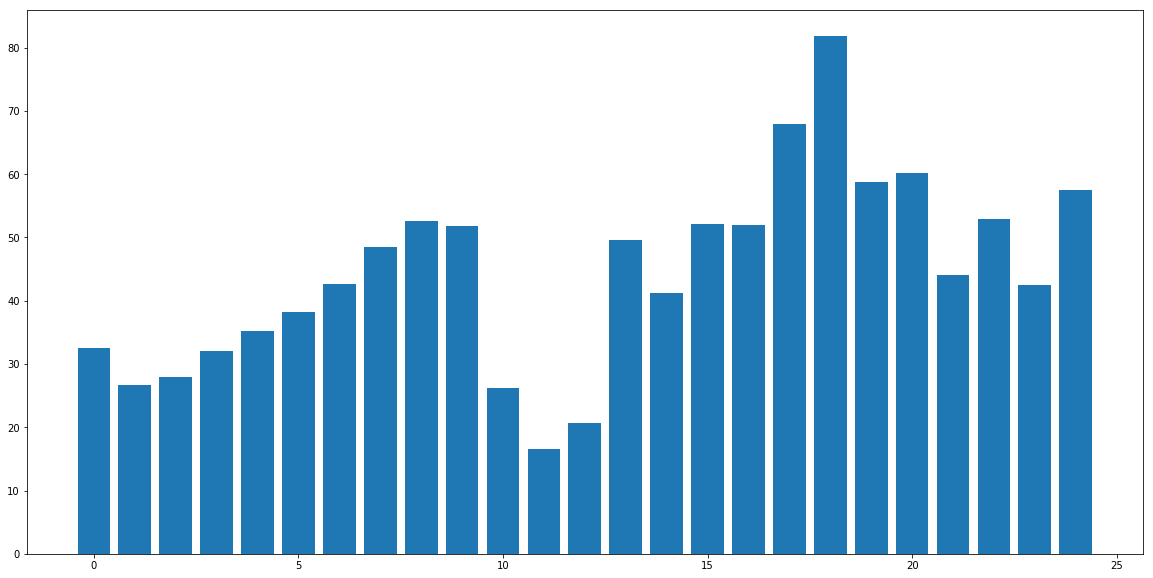

In [32]:
plot(timestep_group_avg_val_seen_l2)

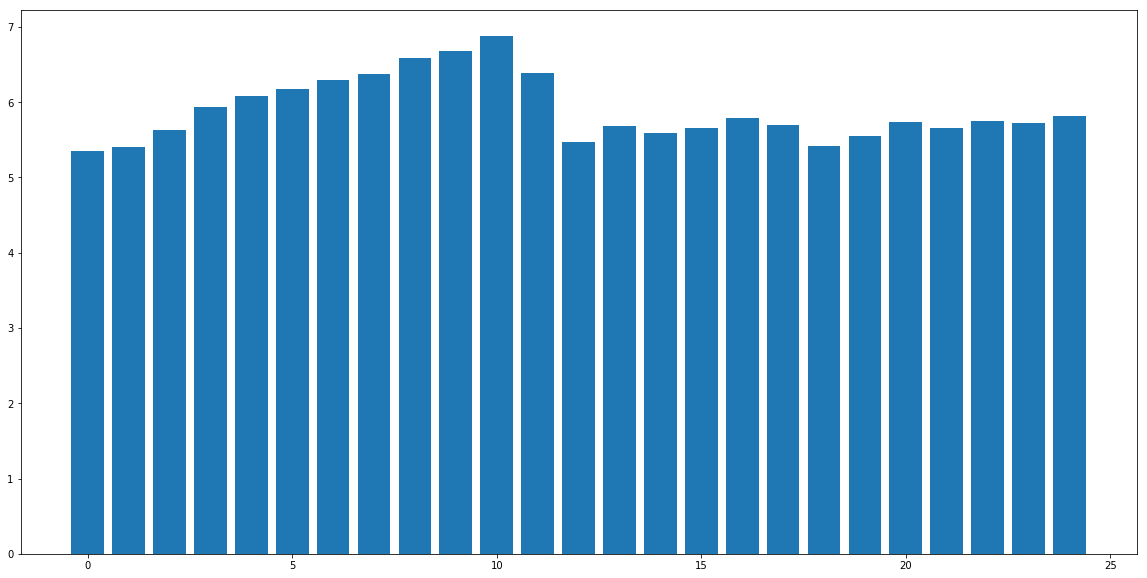

In [33]:
plot(timestep_group_avg_val_unseen_l1)

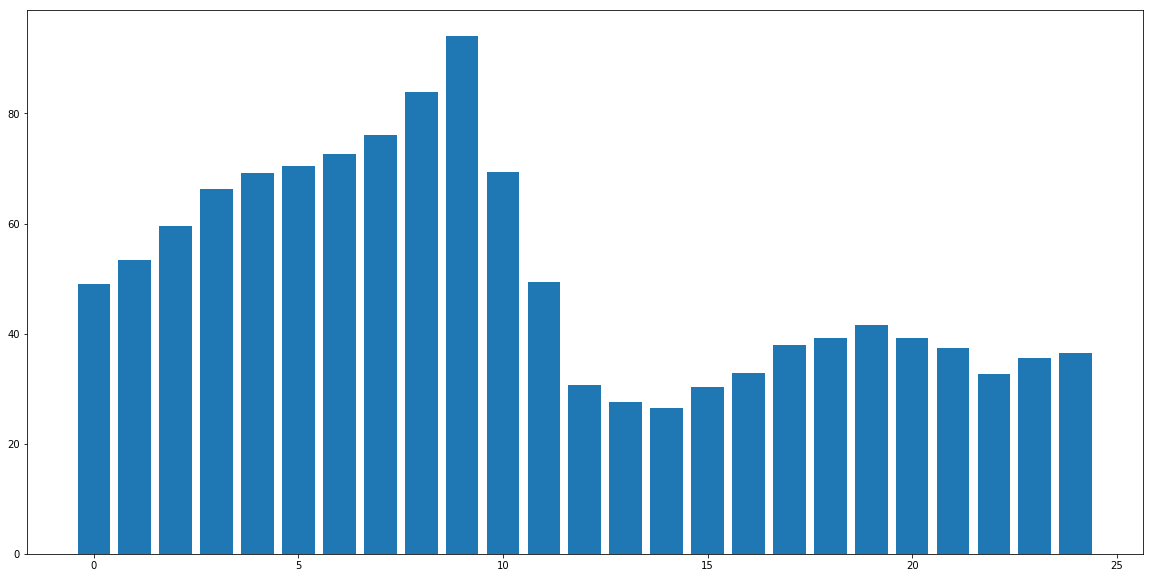

In [34]:
plot(timestep_group_avg_val_unseen_l2)

### What are the q-value sizes?

In [35]:
tar = []
pred = []

for res in val_seen_l1_results:
    timesteps = len(res['agent_q_values'])
    for t in range(timesteps):
        tar += [val for val in res['teacher_q_values'][t] if val != 1e9]
        pred += [val for val in res['agent_q_values'][t] if val != 1e9]

In [36]:
max(tar), min(tar)

(57.17973528997818, 0.3287194101357572)

In [37]:
max(pred), min(pred)

(51.32027053833008, 1.0746458768844604)

In [38]:
tar = []
pred = []

for res in val_seen_l2_results:
    timesteps = len(res['agent_q_values'])
    for t in range(timesteps):
        tar += [val for val in res['teacher_q_values'][t] if val != 1e9]
        pred += [val for val in res['agent_q_values'][t] if val != 1e9]

In [39]:
max(tar), min(tar)

(56.509506174029944, 0.3287194101357572)

In [40]:
max(pred), min(pred)

(51.936134338378906, 0.6108593940734863)

### Group by gold Q-value sizes

In [41]:
def compute_loss_by_q_targets(results):

    tars = []
    preds = []

    for task in results:

        timesteps = len(task['agent_q_values'])

        for t in range(timesteps):
            tars += [val for val in task['teacher_q_values'][t] if val != 1e9]
            preds += [val for val in task['agent_q_values'][t] if val != 1e9]

    l1_losses = np.abs(np.array(tars) - np.array(preds))
    l2_losses = (np.array(tars) - np.array(preds))**2

    return np.array(tars), np.array(preds), l1_losses, l2_losses

In [42]:
val_seen_l1_tars, val_seen_l1_preds, val_seen_l1_losses, _ = compute_loss_by_q_targets(val_seen_l1_results)
val_seen_l2_tars, val_seen_l2_preds, _, val_seen_l2_losses = compute_loss_by_q_targets(val_seen_l2_results)

val_unseen_l1_tars, val_unseen_l1_preds, val_unseen_l1_losses, _ = compute_loss_by_q_targets(val_unseen_l1_results)
val_unseen_l2_tars, val_unseen_l2_preds, _, val_unseen_l2_losses = compute_loss_by_q_targets(val_unseen_l2_results)

In [46]:
def plot_loss_grouped_by_q_target_size(results, loss_str, sample_size=5000):
    tars, preds, l1_losses, l2_losses = compute_loss_by_q_targets(results)
    indices = np.random.choice(len(tars), size=sample_size)
  
    plt.figure(figsize=(20,10))
    if loss_str == 'l1':
        plt.bar(tars[indices], l1_losses[indices])
    else:
        plt.bar(tars[indices], l2_losses[indices])

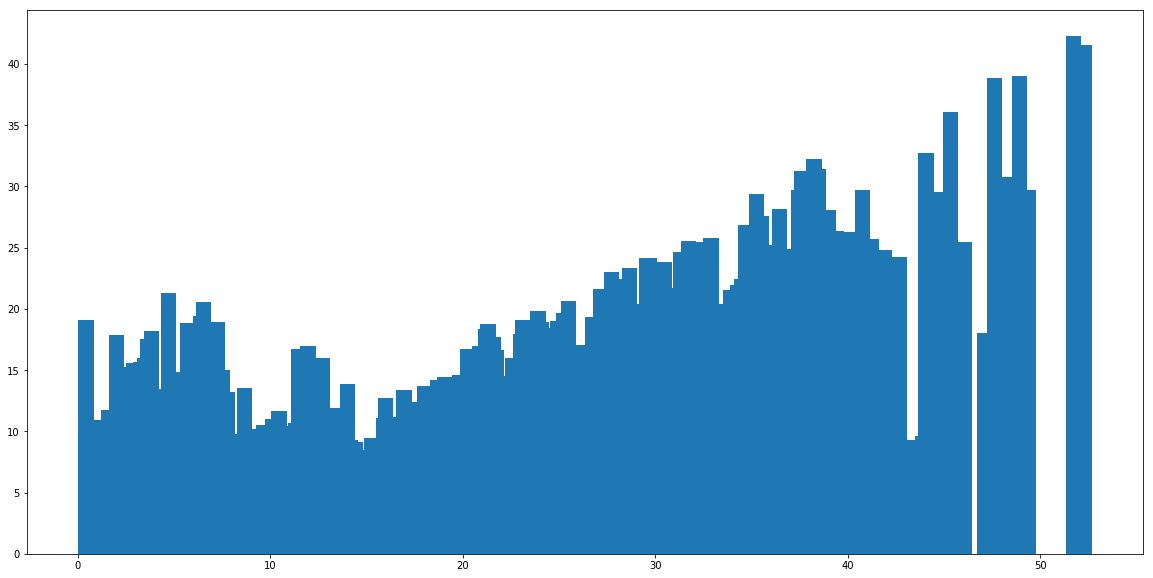

In [47]:
plot_loss_grouped_by_q_target_size(val_seen_l1_results, 'l1')

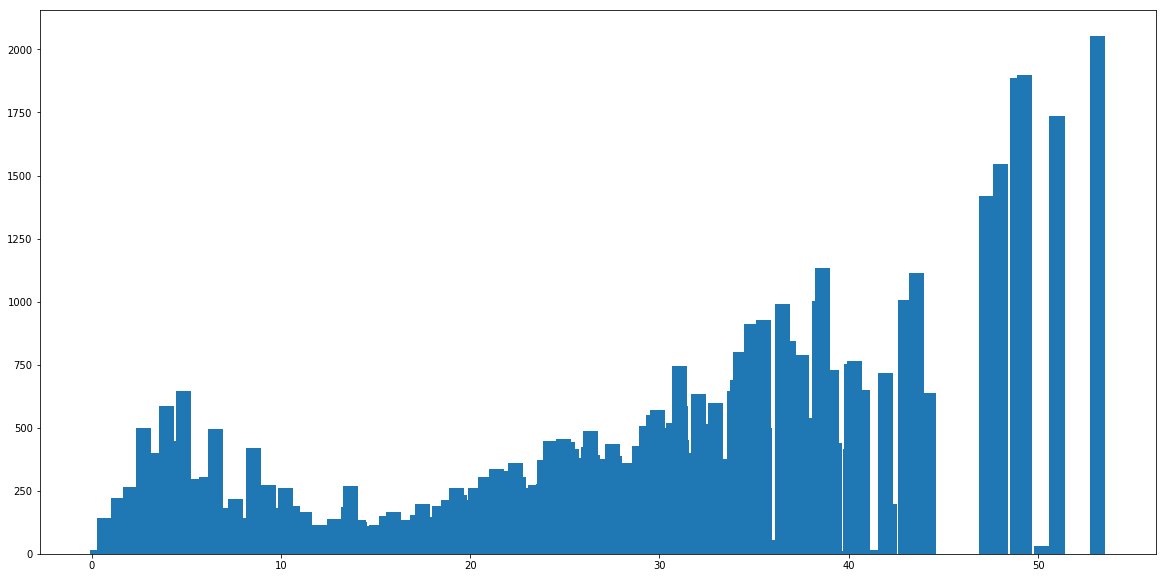

In [49]:
plot_loss_grouped_by_q_target_size(val_seen_l2_results, 'l2')

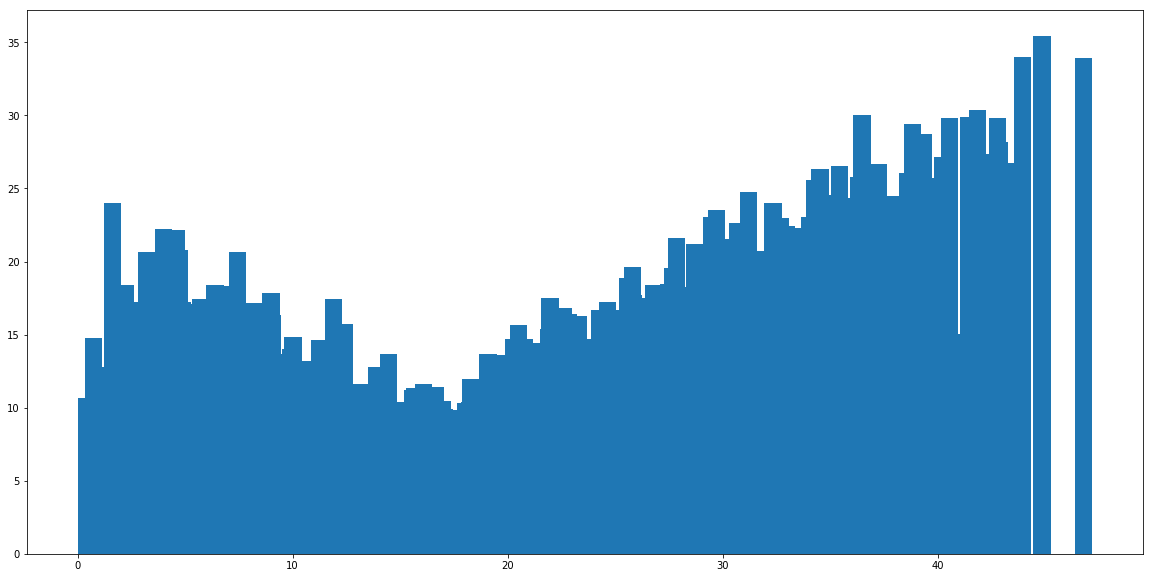

In [50]:
plot_loss_grouped_by_q_target_size(val_unseen_l1_results, 'l1')

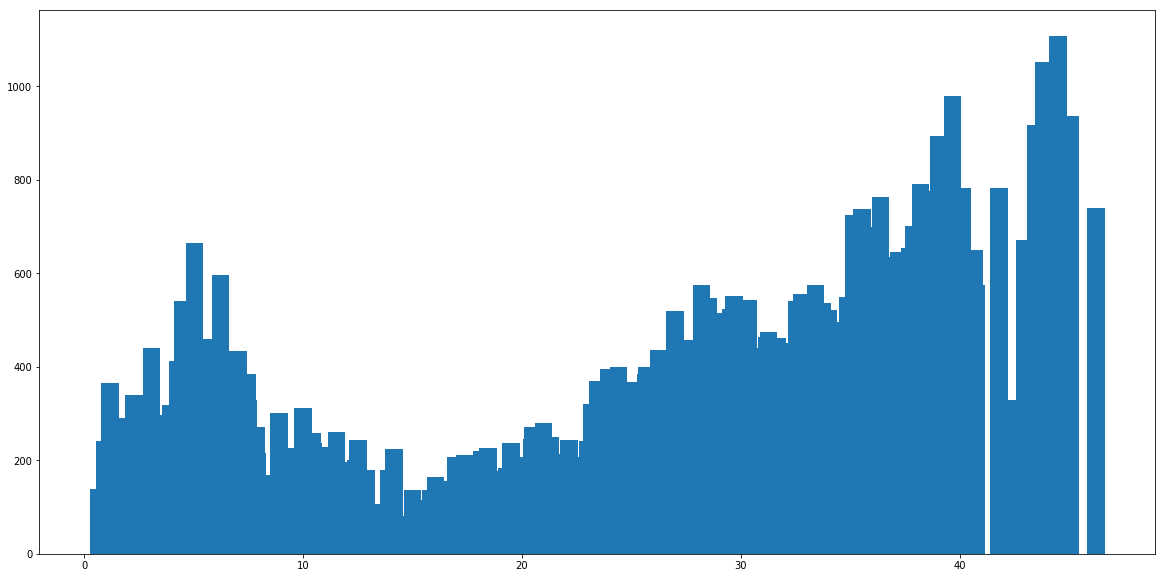

In [51]:
plot_loss_grouped_by_q_target_size(val_unseen_l2_results, 'l2')

### Group by gold Q-value sizes

In [17]:
def compute_loss_by_room_types(results):

    tars = []
    preds = []
    rms_curr = []
    rms_next = []

    for task in results:

        timesteps = len(task['agent_q_values'])
        scan = task['scan']
#         import pdb; pdb.set_trace()
        panos_to_region = utils.load_panos_to_region(scan, '')
        
        for t in range(timesteps):
            tars += [val for val in task['teacher_q_values'][t] if val != 1e9]
            preds += [val for val in task['agent_q_values'][t] if val != 1e9]
            vertex_curr = task['trajectory'][t][0]
            vertex_next = task['trajectory'][t+1][0]
#             import pdb; pdb.set_trace()
            rm_label_curr = panos_to_region[vertex_curr]
            rm_label_next = panos_to_region[vertex_next]
            
            rms_curr += [rm_label_curr for _ in range(len(tars))]
            rms_next += [rm_label_next for _ in range(len(tars))]

    l1_losses = np.abs(np.array(tars) - np.array(preds))
    l2_losses = (np.array(tars) - np.array(preds))**2

    return np.array(tars), np.array(preds), l1_losses, l2_losses, rms_curr, rms_next

In [61]:
val_unseen_l2_results[0].keys()

dict_keys(['beta', 'instr_id', 'agent_q_values', 'trajectory', 'expert_rollin_bool', 'agent_nav', 'scan', 'teacher_q_values'])

In [18]:
tars, preds, l1_losses, l2_losses, rms_curr, rms_next = compute_loss_by_room_types(val_unseen_l2_results)

In [9]:
def plot_loss_grouped_by_rm_types(results, loss_str, rm_str ,sample_size=5000):
    tars, preds, l1_losses, l2_losses, rms_curr, rms_next = compute_loss_by_room_types(results)
    indices = np.random.choice(len(tars), size=sample_size)
  
    plt.figure(figsize=(20,10))
    if loss_str == 'l1':
        if rm_str == 'curr':
            plt.bar(rms_curr[indices], l1_losses[indices])
        else:
            plt.bar(rms_curr[indices], l1_losses[indices])
    else:
        if rm_str == 'curr':
            plt.bar(rms_curr[indices], l2_losses[indices])
        else:
            plt.bar(rms_next[indices], l1_losses[indices])

1